<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/hw2/q2/hw2q2_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
  df = pd.read_csv('/content/teleCust1000t.csv')
  print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [4]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


(   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
 0       2      13   44        1        9    64.0   4       5     0.0       0   
 1       3      11   33        1        7   136.0   5       5     0.0       0   
 2       3      68   52        1       24   116.0   1      29     0.0       1   
 3       2      33   33        0       12    33.0   2       0     0.0       1   
 4       2      23   30        1        9    30.0   1       2     0.0       0   
 
    reside  custcat  
 0       2        1  
 1       6        4  
 2       2        3  
 3       1        1  
 4       4        3  ,
 None)

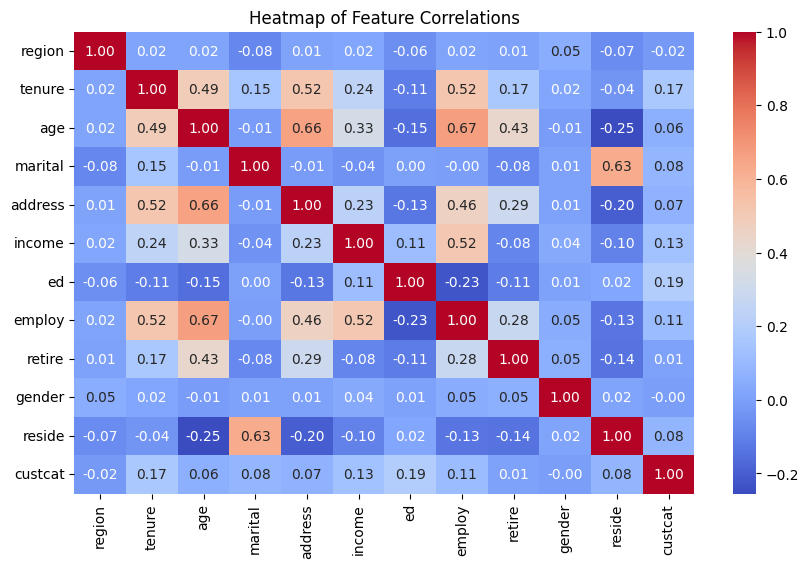

Index(['ed', 'tenure'], dtype='object')

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Find the two features with the highest correlation with the target 'custcat'
correlations_with_target = correlation_matrix["custcat"].sort_values(ascending=False)
top_features = correlations_with_target.index[1:3]  # Exclude 'custcat' itself
top_features


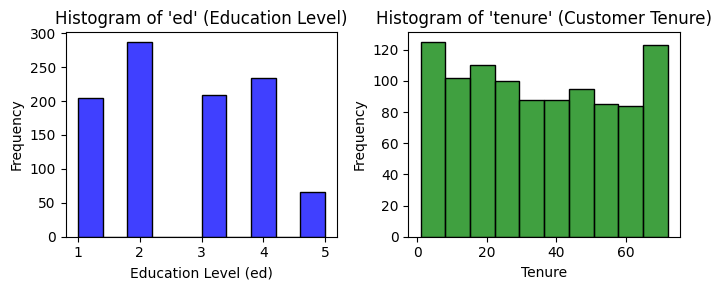

In [9]:
# Plot histograms for the two features with the highest correlation with 'custcat'
plt.figure(figsize=(7, 3))

# Histogram for 'ed'
plt.subplot(1, 2, 1)
sns.histplot(df['ed'], kde=False, bins=10, color="blue", edgecolor="black")
plt.title("Histogram of 'ed' (Education Level)")
plt.xlabel("Education Level (ed)")
plt.ylabel("Frequency")

# Histogram for 'tenure'
plt.subplot(1, 2, 2)
sns.histplot(df['tenure'], kde=False, bins=10, color="green", edgecolor="black")
plt.title("Histogram of 'tenure' (Customer Tenure)")
plt.xlabel("Tenure")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#2. جدا کردن ویژگی‌ها (X) و هدف (y)
X = df.drop(columns=['custcat'])
y = df['custcat']

# 3. نرمالایز کردن داده‌ها با MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. تقسیم داده‌ها به train، test و validation
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 60% train
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% test, 20% validation

# 5. بررسی سایز هر مجموعه
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (600, 11)
Testing set size: (200, 11)
Validation set size: (200, 11)
